In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [2]:
df = pd.read_csv('features_extracted.csv')
df

,name,steam_appid,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,description_758,description_759,description_760,description_761,description_762,description_763,description_764,description_765,description_766,description_767
0,Clash of Warlords,1430720,False,0,2,1,1,1,3,False,...,0.044189,0.008990,0.037291,0.093946,0.068796,-0.014621,0.158587,-0.118073,0.070505,-0.006734
1,Mine Crazy: The Korean Grinder,1430740,False,0,1,1,1,4,2,False,...,0.032085,0.007106,0.072068,0.074086,0.099032,-0.022591,0.149205,-0.071686,0.079684,-0.027101
2,Fade,1430100,False,0,1,1,1,2,2,False,...,0.059402,0.015776,0.053784,0.073522,0.099779,-0.015478,0.108809,-0.095704,0.088155,-0.010766
3,Clash: Artifacts of Chaos,1430680,False,759,13,1,1,3,6,False,...,0.032469,0.027759,0.061394,0.065656,0.083638,-0.000995,0.122059,-0.096047,0.087325,-0.036018
4,Astatos,1430970,False,243,3,1,1,4,9,False,...,0.031386,0.017251,0.064261,0.061784,0.095770,-0.002748,0.133868,-0.117349,0.086446,-0.025368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91278,Survive Avalon,1617600,False,0,1,1,1,2,3,False,...,0.091528,0.001114,0.127067,0.017323,0.151991,-0.017150,0.192407,-0.080582,0.097609,-0.004026
91279,Cam Circle VR,1617770,False,0,1,1,1,1,2,False,...,0.023619,0.020511,0.079572,0.074883,0.084747,0.001139,0.128561,-0.078396,0.074881,0.018819
91280,Neon Light,1617780,False,0,1,1,1,3,3,False,...,0.080847,-0.002328,0.075592,0.029822,0.063645,0.004751,0.114775,-0.085941,0.106455,-0.000475
91281,G for Gravity,1617790,True,0,1,1,1,3,2,False,...,0.040040,-0.009075,0.070354,0.069413,0.104669,-0.033823,0.136881,-0.058575,0.060078,-0.020842


In [3]:
df['num_publishers'].describe()

count    91283.000000
mean         1.043612
std          0.230347
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: num_publishers, dtype: float64

In [4]:
df[df['num_publishers'] > 1]

,name,steam_appid,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,description_758,description_759,description_760,description_761,description_762,description_763,description_764,description_765,description_766,description_767
21,The Space in Between,1430240,True,0,1,8,6,4,1,False,...,0.040321,0.008555,0.086206,-0.006813,0.075954,-0.044094,0.111239,-0.089558,0.112454,0.022028
26,Cross Maid,1424870,False,210,1,1,2,3,4,False,...,0.036723,0.029946,0.100604,0.035926,0.104533,-0.042243,0.147410,-0.055106,0.097812,0.001025
37,Verne: The Shape of Fantasy,1424600,False,142,7,1,2,2,5,False,...,0.018609,0.023305,0.068071,0.049636,0.113235,-0.015897,0.123153,-0.065142,0.074983,-0.011216
61,AaaaaAAaaaAAAaaAAAAaAAAAA!!! Remastered,1372460,False,0,1,2,2,2,3,False,...,0.053322,0.016616,0.096482,0.050154,0.078621,-0.059921,0.134133,-0.116821,0.070834,-0.005387
114,RANGER VS. DRONES,1615380,True,0,2,2,2,2,3,False,...,0.005975,0.026687,0.077038,0.027639,0.100778,-0.015102,0.146895,-0.084463,0.069841,0.011401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91146,Copycat,1622350,False,1258,11,1,3,2,6,False,...,0.041015,0.009999,0.063251,0.087706,0.090919,-0.002837,0.109387,-0.097630,0.075610,-0.009339
91160,Latex Dungeon,1622780,False,825,6,2,2,1,2,False,...,-0.003306,0.026633,0.066066,0.020726,0.105117,-0.037844,0.149930,-0.053843,0.095945,-0.019987
91223,Death Roads: Tournament,1619570,False,614,7,1,2,3,5,False,...,0.033456,0.006327,0.060347,0.056519,0.068599,-0.015073,0.085305,-0.093469,0.078388,0.010151
91229,Mello,1619830,True,0,1,4,3,4,1,False,...,0.029580,0.020443,0.078642,0.071732,0.082617,-0.021524,0.147622,-0.090833,0.083844,-0.003250


Text(0.5, 1.0, 'Era')

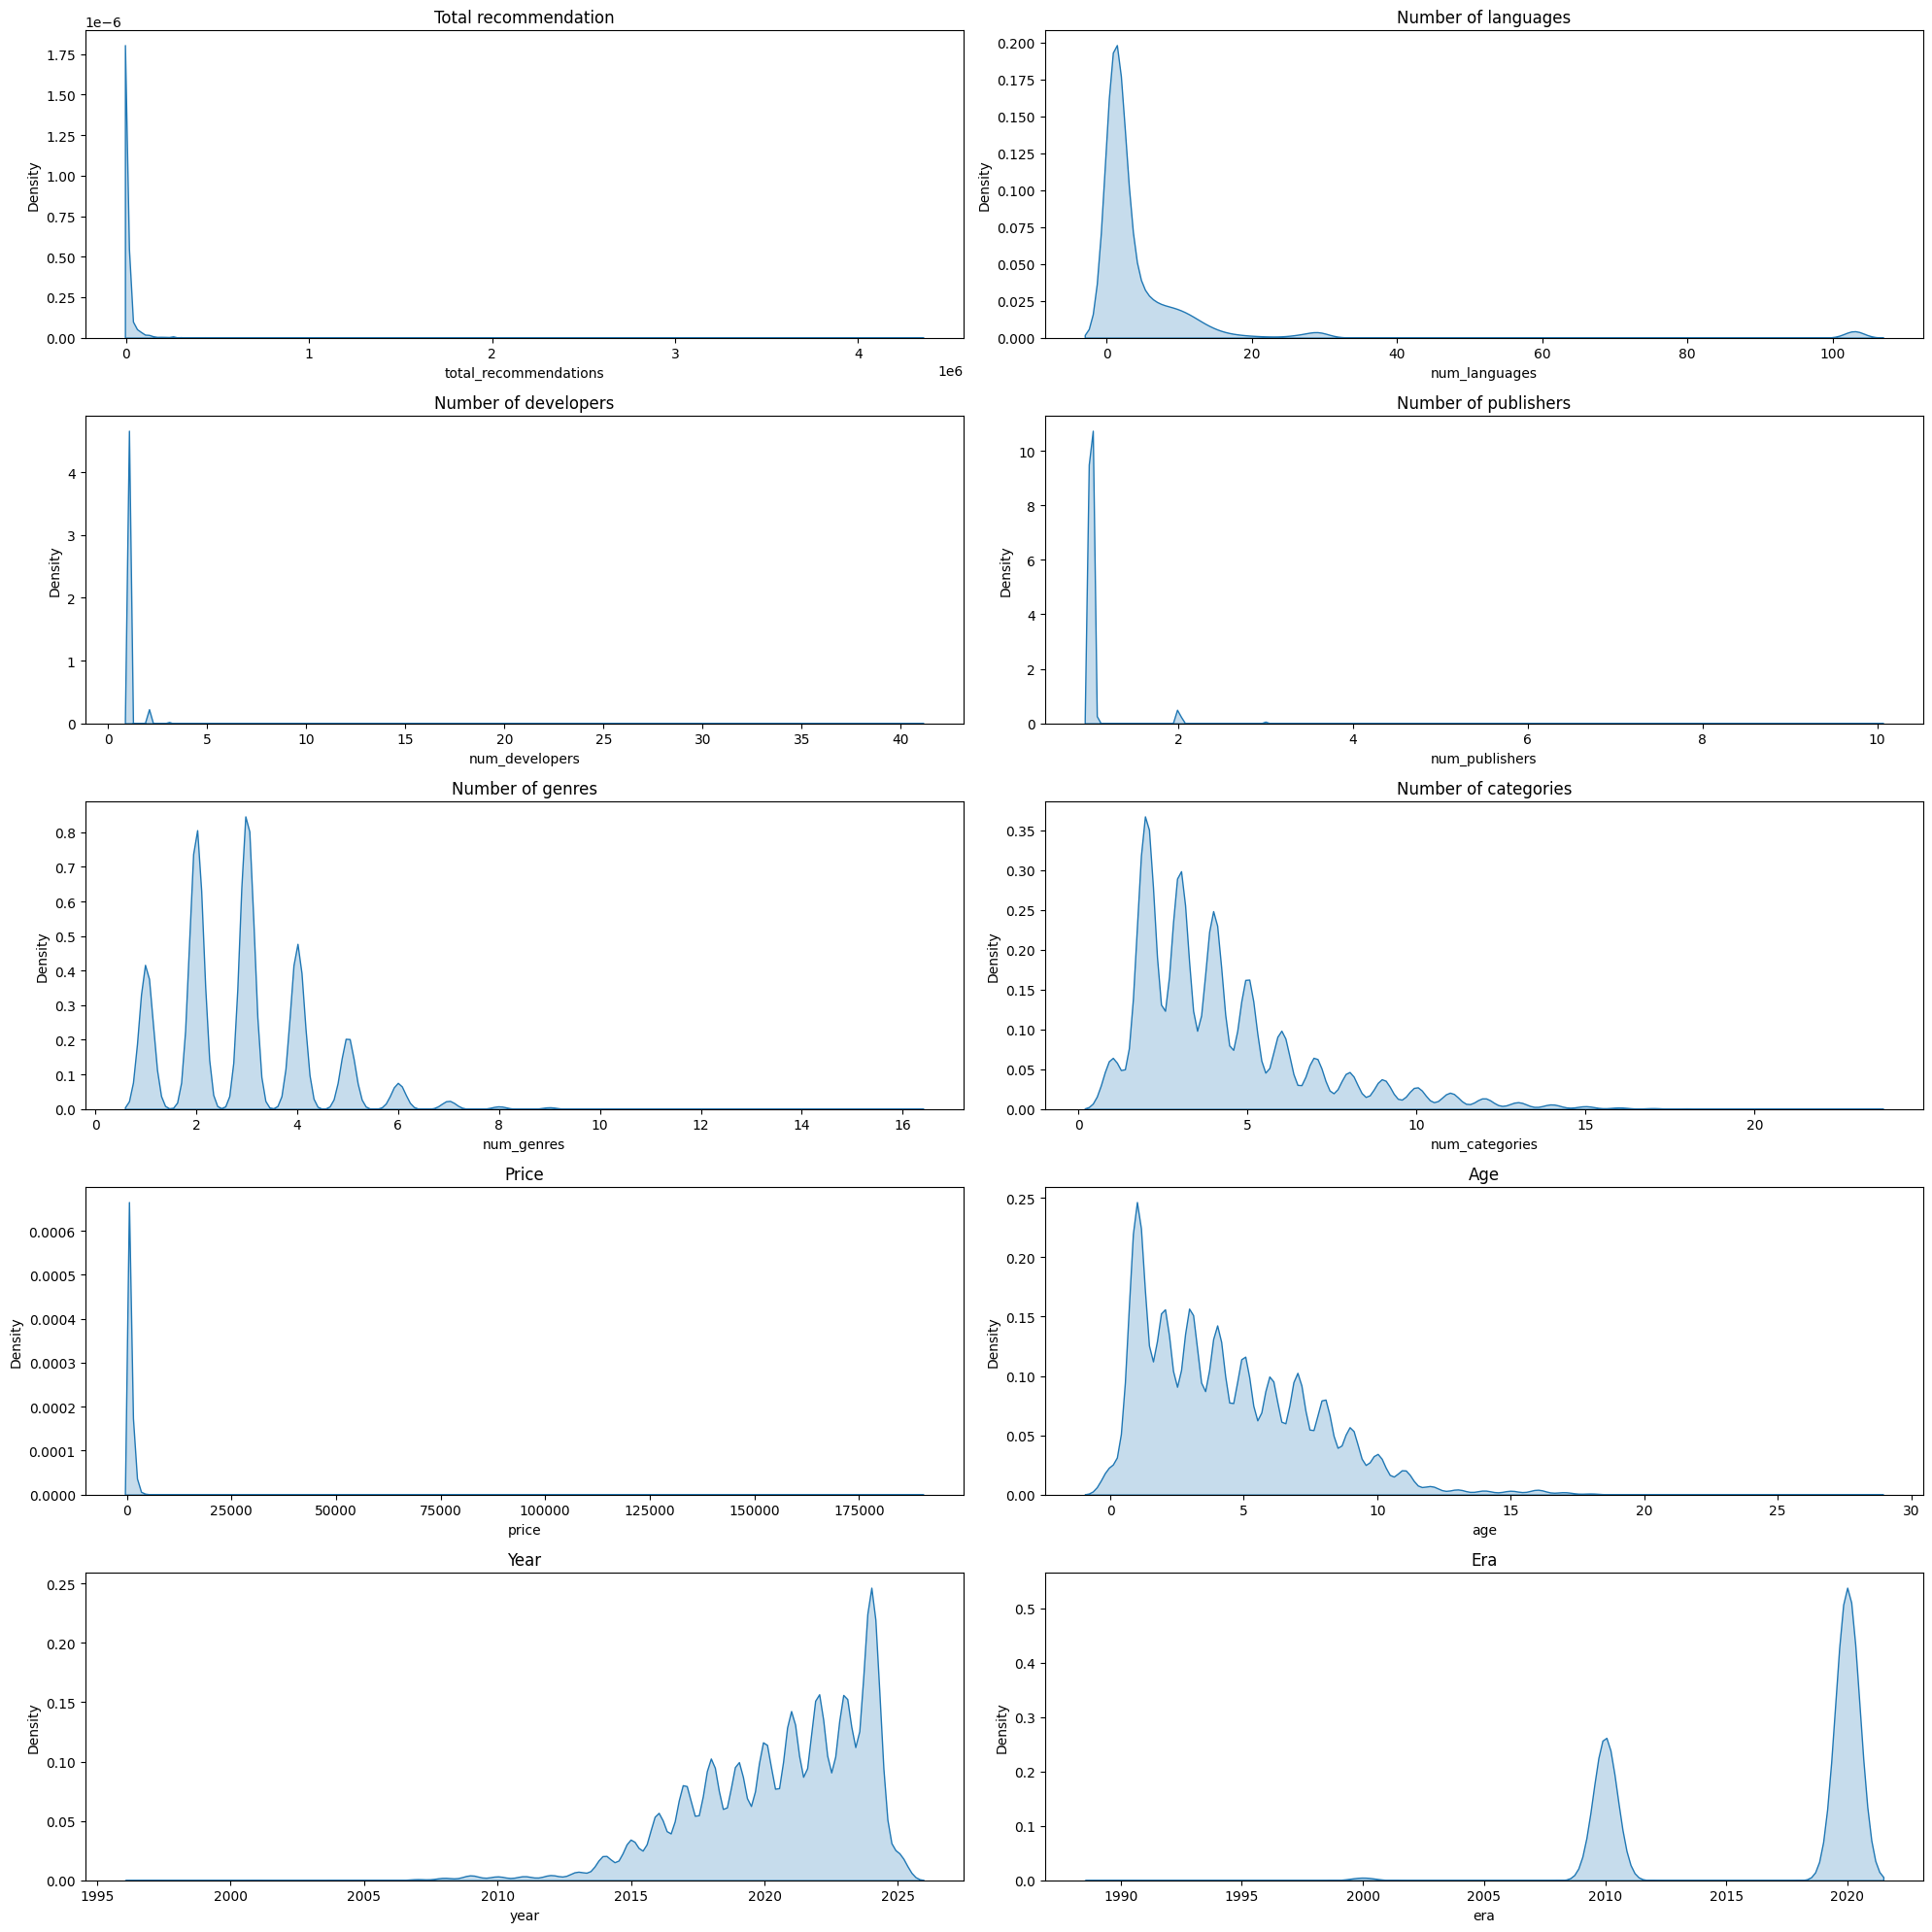

In [5]:
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(20, 20)
fig.set_tight_layout(True)
sns.kdeplot(df['total_recommendations'], fill=True, ax=axs[0,0])
axs[0, 0].set_title('Total recommendation')
sns.kdeplot(df['num_languages'], fill=True, ax=axs[0,1])
axs[0, 1].set_title('Number of languages')
sns.kdeplot(df['num_developers'], fill=True, ax=axs[1,0])
axs[1, 0].set_title('Number of developers')
sns.kdeplot(df['num_publishers'], fill=True, ax=axs[1,1])
axs[1, 1].set_title('Number of publishers')
sns.kdeplot(df['num_genres'], fill=True, ax=axs[2,0])
axs[2, 0].set_title('Number of genres')
sns.kdeplot(df['num_categories'], fill=True, ax=axs[2,1])
axs[2, 1].set_title('Number of categories')
sns.kdeplot(df['price'], fill=True, ax=axs[3,0])
axs[3, 0].set_title('Price')
sns.kdeplot(df['age'], fill=True, ax=axs[3,1])
axs[3, 1].set_title('Age')
sns.kdeplot(df['year'], fill=True, ax=axs[4,0])
axs[4, 0].set_title('Year')
sns.kdeplot(df['era'], fill=True, ax=axs[4,1])
axs[4, 1].set_title('Era')

Some columns need to be scaled before calculating the cosine similarity:
- Fixed range features: day (1 - 31), month (1 - 12)
- Highly skewed features: total_recommendations, num_languages, num_developers, num_publishers, num_genres, num_categories, price, year, age, era

In [6]:
scaler = MinMaxScaler()
df['scaled_day'] = scaler.fit_transform(df['day'].to_frame())
df['scaled_day'].describe()

count    91283.000000
mean         0.501525
std          0.295583
min          0.000000
25%          0.233333
50%          0.500000
75%          0.766667
max          1.000000
Name: scaled_day, dtype: float64

In [7]:
df['scaled_month'] = scaler.fit_transform(df['month'].to_frame())
df['scaled_month'].describe()

count    91283.000000
mean         0.520408
std          0.317069
min          0.000000
25%          0.272727
50%          0.545455
75%          0.818182
max          1.000000
Name: scaled_month, dtype: float64

In [8]:
print(f'Min number of developers: {df['num_developers'].min()}')
print(f'Min number of publishers: {df['num_publishers'].min()}')
print(f'Min number of genres: {df['num_genres'].min()}')
print(f'Min number of categories: {df['num_categories'].min()}')
print(f'Min number of languages: {df['num_languages'].min()}')
print(f'Min year: {df['year'].min()}')
print(f'Min era: {df['era'].min()}')

Min number of developers: 1
Min number of publishers: 1
Min number of genres: 1
Min number of categories: 1
Min number of languages: 1
Min year: 1997
Min era: 1990


In [9]:
df['scaled_num_developers'] = np.log(df['num_developers'])
df['scaled_num_publishers'] = np.log(df['num_publishers'])
df['scaled_num_genres'] = np.log(df['num_genres'])
df['scaled_num_categories'] = np.log(df['num_categories'])
df['scaled_num_languages'] = np.log(df['num_languages'])
df['scaled_year'] = np.log(df['year'])
df['scaled_era'] = np.log(df['era'])

In [10]:
df[['scaled_num_developers', 'scaled_num_publishers', 'scaled_num_genres', 'scaled_num_categories', 'scaled_num_languages', 'scaled_year', 'scaled_era']]

,scaled_num_developers,scaled_num_publishers,scaled_num_genres,scaled_num_categories,scaled_num_languages,scaled_year,scaled_era
0,0.0,0.0,0.000000,1.098612,0.693147,7.611348,7.610853
1,0.0,0.0,1.386294,0.693147,0.000000,7.610853,7.610853
2,0.0,0.0,0.693147,0.693147,0.000000,7.610853,7.610853
3,0.0,0.0,1.098612,1.791759,2.564949,7.612337,7.610853
4,0.0,0.0,1.386294,2.197225,1.098612,7.611348,7.610853
...,...,...,...,...,...,...,...
91278,0.0,0.0,0.693147,1.098612,0.000000,7.611348,7.610853
91279,0.0,0.0,0.000000,0.693147,0.000000,7.611348,7.610853
91280,0.0,0.0,1.098612,1.098612,0.000000,7.611348,7.610853
91281,0.0,0.0,1.098612,0.693147,0.000000,7.611348,7.610853


In [11]:
df['scaled_total_recommendations'] = np.log1p(df['total_recommendations'])
df['scaled_price'] = np.log1p(df['price'])
df['scaled_age'] = np.log1p(df['age'])

In [12]:
df[['scaled_total_recommendations', 'scaled_price', 'scaled_age']]

,scaled_total_recommendations,scaled_price,scaled_age
0,0.000000,6.551080,1.609438
1,0.000000,5.298317,1.791759
2,0.000000,5.298317,1.791759
3,6.633318,8.006368,1.098612
4,5.497168,7.313220,1.609438
...,...,...,...
91278,0.000000,7.170120,1.609438
91279,0.000000,5.703782,1.609438
91280,0.000000,5.298317,1.609438
91281,0.000000,0.000000,1.609438


Text(0.5, 1.0, 'Era')

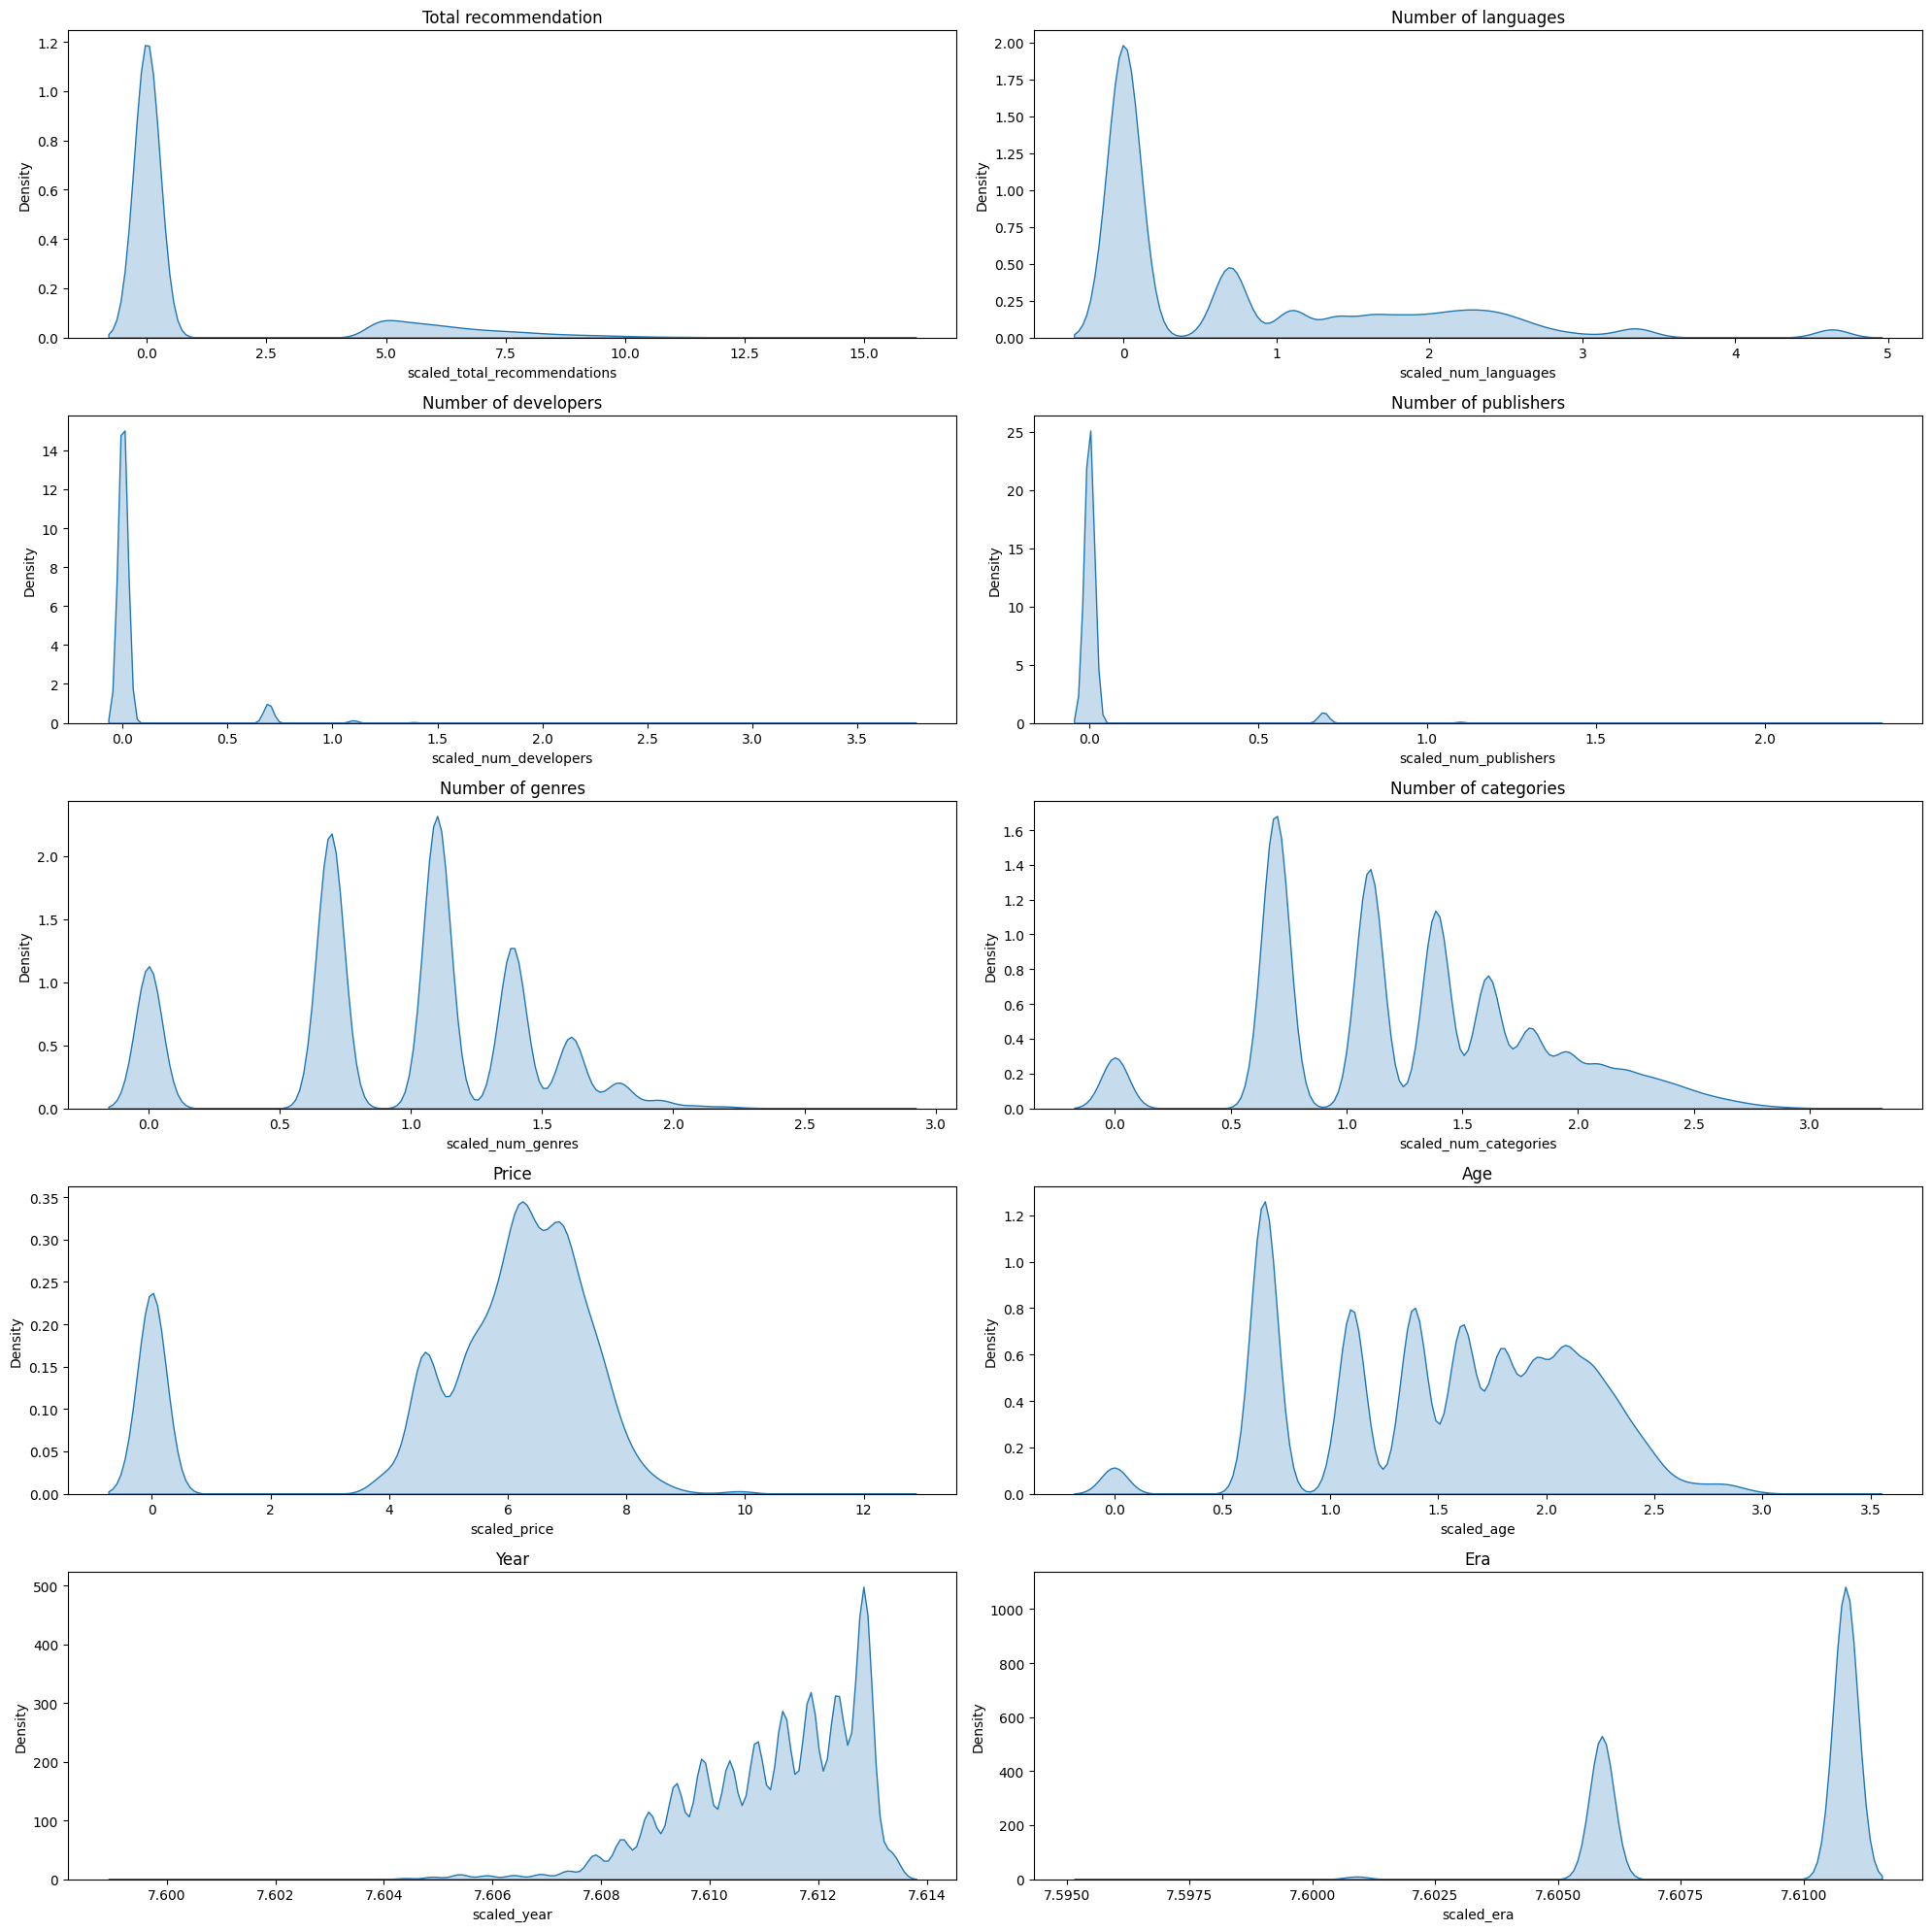

In [13]:
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(20, 20)
fig.set_tight_layout(True)
sns.kdeplot(df['scaled_total_recommendations'], fill=True, ax=axs[0,0])
axs[0, 0].set_title('Total recommendation')
sns.kdeplot(df['scaled_num_languages'], fill=True, ax=axs[0,1])
axs[0, 1].set_title('Number of languages')
sns.kdeplot(df['scaled_num_developers'], fill=True, ax=axs[1,0])
axs[1, 0].set_title('Number of developers')
sns.kdeplot(df['scaled_num_publishers'], fill=True, ax=axs[1,1])
axs[1, 1].set_title('Number of publishers')
sns.kdeplot(df['scaled_num_genres'], fill=True, ax=axs[2,0])
axs[2, 0].set_title('Number of genres')
sns.kdeplot(df['scaled_num_categories'], fill=True, ax=axs[2,1])
axs[2, 1].set_title('Number of categories')
sns.kdeplot(df['scaled_price'], fill=True, ax=axs[3,0])
axs[3, 0].set_title('Price')
sns.kdeplot(df['scaled_age'], fill=True, ax=axs[3,1])
axs[3, 1].set_title('Age')
sns.kdeplot(df['scaled_year'], fill=True, ax=axs[4,0])
axs[4, 0].set_title('Year')
sns.kdeplot(df['scaled_era'], fill=True, ax=axs[4,1])
axs[4, 1].set_title('Era')

In [14]:
titles = df['name'].copy().to_list()

In [15]:
titles

['Clash of Warlords',
 'Mine Crazy: The Korean Grinder',
 'Fade',
 'Clash: Artifacts of Chaos',
 'Astatos',
 'Stay Safe 2020',
 'Into The Haze',
 'Space Love Delta',
 'Musical Balls',
 'World of Wonder',
 'Space Empires III',
 'Monstermonger',
 'NetGunner',
 'Raji: Prologue',
 'Boom Face',
 'Project Mirror',
 'Dungeon Lord',
 'CBT With Yuuka Kazami',
 'Space Plane',
 'Vocal Space Shooter',
 'ARCADEON VR',
 'The Space in Between',
 'Angry Emoji The Game',
 'Castlehold',
 'The secret of the stone',
 '余烬',
 'Cross Maid',
 'Delta0',
 'Aery - Broken Memories',
 'CosmoDreamer',
 'Geneforge 1 - Mutagen',
 'Botany Manor',
 'Flicker',
 'Astria',
 '墨心：波云诡船',
 '天仙变',
 'Air Attack',
 'Verne: The Shape of Fantasy',
 '9-nine-:Episode 4',
 '10mg :)',
 'Razenroth 2',
 'KEO',
 'Aery - Little Bird Adventure',
 '自西徂东',
 'Hentai Vs Orcs',
 'Hatchwell',
 'My Little Dog Adventure',
 'Warriors Defense',
 'Bish Bash Bots',
 'Live the Life',
 'Portals World',
 'Cube Raiders',
 'Lonely Birds',
 'Offroad Racing 

In [16]:
df_features = df.drop(columns=['name', 'steam_appid', 'total_recommendations', 'num_languages', 'num_developers', 'num_publishers', 'num_genres', 'num_categories', 'day', 'month', 'year', 'age', 'era', 'price'])

In [17]:
sparse_data = csr_matrix(df_features.values.astype(np.float64))

In [25]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
knn.fit(sparse_data)

distances, indices = knn.kneighbors(sparse_data, n_neighbors=10)

In [32]:
distances, indices = knn.kneighbors(sparse_data[0], 10)

In [43]:
df.iloc[indices.tolist()[0]]

,name,steam_appid,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,scaled_num_developers,scaled_num_publishers,scaled_num_genres,scaled_num_categories,scaled_num_languages,scaled_year,scaled_era,scaled_total_recommendations,scaled_price,scaled_age
0,Clash of Warlords,1430720,False,0,2,1,1,1,3,False,...,0.0,0.0,0.000000,1.098612,0.693147,7.611348,7.610853,0.0,6.551080,1.609438
22992,Before Sunset 日落之前,1980820,False,0,2,1,1,3,2,False,...,0.0,0.0,1.098612,0.693147,0.693147,7.612337,7.610853,0.0,6.684612,1.098612
38656,Birds with Feelings,1253650,False,0,1,1,1,1,2,False,...,0.0,0.0,0.000000,0.693147,0.000000,7.611842,7.610853,0.0,6.551080,1.386294
45083,人間牧場 Residence,2305760,False,0,3,1,1,1,3,False,...,0.0,0.0,0.000000,1.098612,1.098612,7.612337,7.610853,0.0,5.991465,1.098612
91199,Noctambulant,1620640,False,0,3,1,1,3,2,False,...,0.0,0.0,1.098612,0.693147,1.098612,7.611348,7.610853,0.0,6.214608,1.609438
88068,BoingBoingOuch,1426100,False,0,1,1,1,1,2,False,...,0.0,0.0,0.000000,0.693147,0.000000,7.611842,7.610853,0.0,5.703782,1.386294
4676,幻想啟示錄,1488250,False,0,1,1,1,1,2,False,...,0.0,0.0,0.000000,0.693147,0.000000,7.611348,7.610853,0.0,6.907755,1.609438
65796,末日杀 Might & Trap: Apocalypse,1464410,False,0,3,1,1,2,4,False,...,0.0,0.0,0.693147,1.386294,1.098612,7.611348,7.610853,0.0,7.600902,1.609438
37386,~府城少女~ 以妳為名的府城情書,1429610,False,0,1,1,1,3,2,False,...,0.0,0.0,1.098612,0.693147,0.000000,7.611348,7.610853,0.0,6.907755,1.609438
44490,Pandora Galaxy,1226610,False,0,3,1,1,1,2,False,...,0.0,0.0,0.000000,0.693147,1.098612,7.610853,7.610853,0.0,6.802395,1.791759


In [47]:
df[df['steam_appid'] == 990080]

,name,steam_appid,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,scaled_num_developers,scaled_num_publishers,scaled_num_genres,scaled_num_categories,scaled_num_languages,scaled_year,scaled_era,scaled_total_recommendations,scaled_price,scaled_age
83662,Hogwarts Legacy,990080,False,220785,14,1,1,3,7,False,...,0.0,0.0,1.098612,1.94591,2.639057,7.612337,7.610853,12.304949,7.495542,1.098612


In [48]:
distances, indices = knn.kneighbors(sparse_data[83662], 10)

In [49]:
df.iloc[indices.tolist()[0]]

,name,steam_appid,is_free,total_recommendations,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,scaled_num_developers,scaled_num_publishers,scaled_num_genres,scaled_num_categories,scaled_num_languages,scaled_year,scaled_era,scaled_total_recommendations,scaled_price,scaled_age
83662,Hogwarts Legacy,990080,False,220785,14,1,1,3,7,False,...,0.000000,0.000000,1.098612,1.945910,2.639057,7.612337,7.610853,12.304949,7.495542,1.098612
73773,Middle-earth™: Shadow of War™,356190,False,78331,13,1,1,3,7,False,...,0.000000,0.000000,1.098612,1.945910,2.564949,7.609367,7.605890,11.268711,8.517193,2.197225
81487,Kingdom Come: Deliverance,379430,False,113309,15,1,2,3,7,False,...,0.000000,0.693147,1.098612,1.945910,2.708050,7.609862,7.605890,11.637883,8.006368,2.079442
80567,Resident Evil 4,2050650,False,107139,13,1,1,2,7,False,...,0.000000,0.000000,0.693147,1.945910,2.564949,7.612337,7.610853,11.581892,7.600902,1.098612
4355,Gotham Knights,1496790,False,14243,13,2,1,3,9,False,...,0.693147,0.000000,1.098612,2.197225,2.564949,7.611842,7.610853,9.564091,8.699515,1.386294
77529,SILENT HILL 2,2124490,False,25612,14,1,1,2,5,False,...,0.000000,0.000000,0.693147,1.609438,2.639057,7.612831,7.610853,10.150855,8.853665,0.693147
73762,Resident Evil 7 Biohazard,418370,False,63216,15,1,1,2,7,False,...,0.000000,0.000000,0.693147,1.945910,2.708050,7.609367,7.605890,11.054329,6.684612,2.197225
81491,Mafia: Definitive Edition,1030840,False,67227,14,1,1,2,6,False,...,0.000000,0.000000,0.693147,1.791759,2.639057,7.610853,7.610853,11.115845,8.294050,1.791759
7519,Back 4 Blood,924970,False,50059,15,1,1,1,9,False,...,0.000000,0.000000,0.000000,2.197225,2.708050,7.611348,7.610853,10.820978,8.699515,1.609438
76556,ELDEN RING,1245620,False,742492,15,1,2,2,11,False,...,0.000000,0.693147,0.693147,2.397895,2.708050,7.611842,7.610853,13.517769,8.699515,1.386294


In [50]:
df_review = pd.read_csv('../../Final/Reviews-raw.csv')

In [51]:
df_review

,Unnamed: 0,recommendationid,author_id,review,timestamp,voted_up,weighted_vote_score,app_id
0,0,186781078,76561197960432447,A legendary tactical shooter that shaped the g...,1738278781,True,0.652997,10
1,1,184974430,76561198071230926,"The best CS sure, but server browser is the il...",1736206418,True,0.581749,10
2,2,186584044,76561198206216352,Some of the best memories of my childhood were...,1738041574,True,0.628378,10
3,3,186564689,76561198110801124,This game feels so much better than CS2. I kno...,1738015332,True,0.000000,10
4,4,186418367,76561199813732773,its very fun to play you can make friends out ...,1737853720,True,0.000000,10
...,...,...,...,...,...,...,...,...
1766438,1766438,122460202,76561198047845894,"A fun and innovative game, not a bad thing to ...",1663545142,True,0.528986,999890
1766439,1766439,142446491,76561198314652319,"Developer, please listen to me, I love the con...",1689826252,True,0.528986,999890
1766440,1766440,72576177,76561198035100973,Disclaimer: My scores/reviews are almost alway...,1595699739,True,0.609249,999990
1766441,1766441,157067109,76561198414383514,Mediocre game with a pathetically bad challeng...,1706470035,False,0.502075,999990


In [52]:
df_review = pd.read_csv('../../Final/Reviews-clean.csv')
df_review

,Unnamed: 0,recommendationid,author_id,timestamp,voted_up,app_id
0,0,186781078,76561197960432447,1738278781,True,10
1,1,184974430,76561198071230926,1736206418,True,10
2,2,186584044,76561198206216352,1738041574,True,10
3,3,186564689,76561198110801124,1738015332,True,10
4,4,186418367,76561199813732773,1737853720,True,10
...,...,...,...,...,...,...
1766438,1766438,122460202,76561198047845894,1663545142,True,999890
1766439,1766439,142446491,76561198314652319,1689826252,True,999890
1766440,1766440,72576177,76561198035100973,1595699739,True,999990
1766441,1766441,157067109,76561198414383514,1706470035,False,999990
